# Classification of Scenarioes - June 2023

This work aims at creating a multiclassification model to predict the emissions classiication of scenarioes from the GGM based on the AR6 DataSet

In [2]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 771.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 13.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 17.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import gspread

In [11]:
## call excel data from a goodl drive folder

## Note the file should be opened with google sheets and the file should be allowed to be shared with everyone and editable

sheet_id = "15zx4uxw8No10_hLqT167bwPzlUWCe0M9Ccnv0gCmm84"
sheet_name = "sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"


In [12]:
print(url)

https://docs.google.com/spreadsheets/d/15zx4uxw8No10_hLqT167bwPzlUWCe0M9Ccnv0gCmm84/gviz/tq?tqx=out:csv&sheet=sheet1


In [3]:
# red the dataframe 
df = pd.read_csv(url)

NameError: name 'url' is not defined

In [4]:
# read the dataset that has demand, emissions and classification categories
df = pd.read_csv('emissionseries_emissions_cat_merged_24August2022.csv')

In [5]:
df.head(10)

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,...,2093,2094,2095,2096,2097,2098,2099,2100,Category,Category_name
0,0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,8.130643,7.738276,7.503108,7.269501,...,2.022680,2.007340,1.992000,1.976660,1.961320,1.945980,1.930640,1.915300,C3,C3: limit warming to 2°C (>67%)
1,1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,382.198514,380.730719,365.470232,350.213054,...,117.482740,116.862420,116.242100,115.621780,115.001460,114.381140,113.760820,113.140500,C3,C3: limit warming to 2°C (>67%)
2,2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,855.912547,836.364378,821.034217,805.723117,...,347.671325,344.756572,341.845444,338.937940,336.034060,333.133803,330.237171,327.344163,C3,C3: limit warming to 2°C (>67%)
3,3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37800.549767,37462.666746,36683.892311,35905.865479,...,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040,C3,C3: limit warming to 2°C (>67%)
4,4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2439.280541,2169.740677,1878.426691,1587.112706,...,-3480.564713,-3471.886089,-3463.207464,-3454.528839,-3445.850214,-3437.171589,-3428.492965,-3419.814340,C3,C3: limit warming to 2°C (>67%)
5,5,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,35361.269226,35292.926069,34805.465619,34318.752772,...,3292.143300,3233.640300,3175.137300,3116.634300,3058.131300,2999.628300,2941.125300,2882.622300,C3,C3: limit warming to 2°C (>67%)
6,6,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|F...,Mt CO2/yr,1190.178027,1165.674969,1121.263133,1076.851297,...,143.863885,142.601876,141.339867,140.077858,138.815849,137.553840,136.291831,135.029822,C3,C3: limit warming to 2°C (>67%)
7,7,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|H...,kt HFC125/yr,125.084805,136.658356,133.882727,131.107097,...,28.493613,28.283417,28.073221,27.863025,27.652828,27.442632,27.232436,27.022240,C3,C3: limit warming to 2°C (>67%)
8,8,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|H...,kt HFC134a/yr,207.938754,209.435092,203.784300,198.133508,...,35.663834,35.397180,35.130526,34.863872,34.597218,34.330564,34.063910,33.797256,C3,C3: limit warming to 2°C (>67%)
9,9,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|H...,kt HFC143a/yr,62.346475,69.837843,68.213382,66.588920,...,10.950003,10.816687,10.683370,10.550054,10.416737,10.283421,10.150105,10.016788,C3,C3: limit warming to 2°C (>67%)


<Axes: xlabel='Model'>

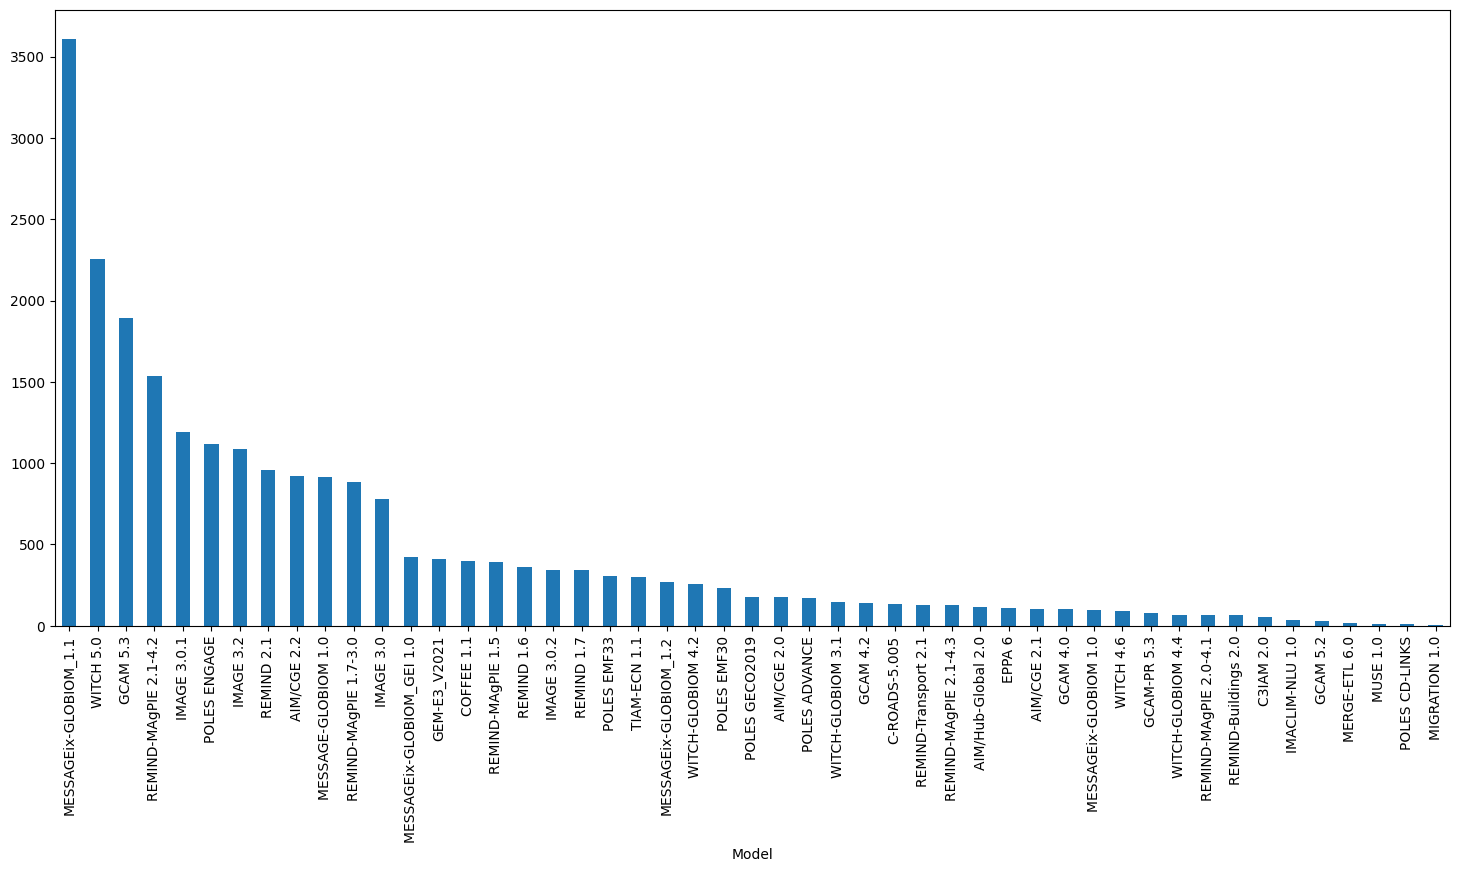

In [6]:
# explore the dataset number of dominat models
plt.figure(figsize=(18, 8))
df['Model'].value_counts().plot(kind= 'bar')

Some models have prodcued more scenarioes than others that is why these models are more presented and dominat in the dataset

<Axes: xlabel='Scenario'>

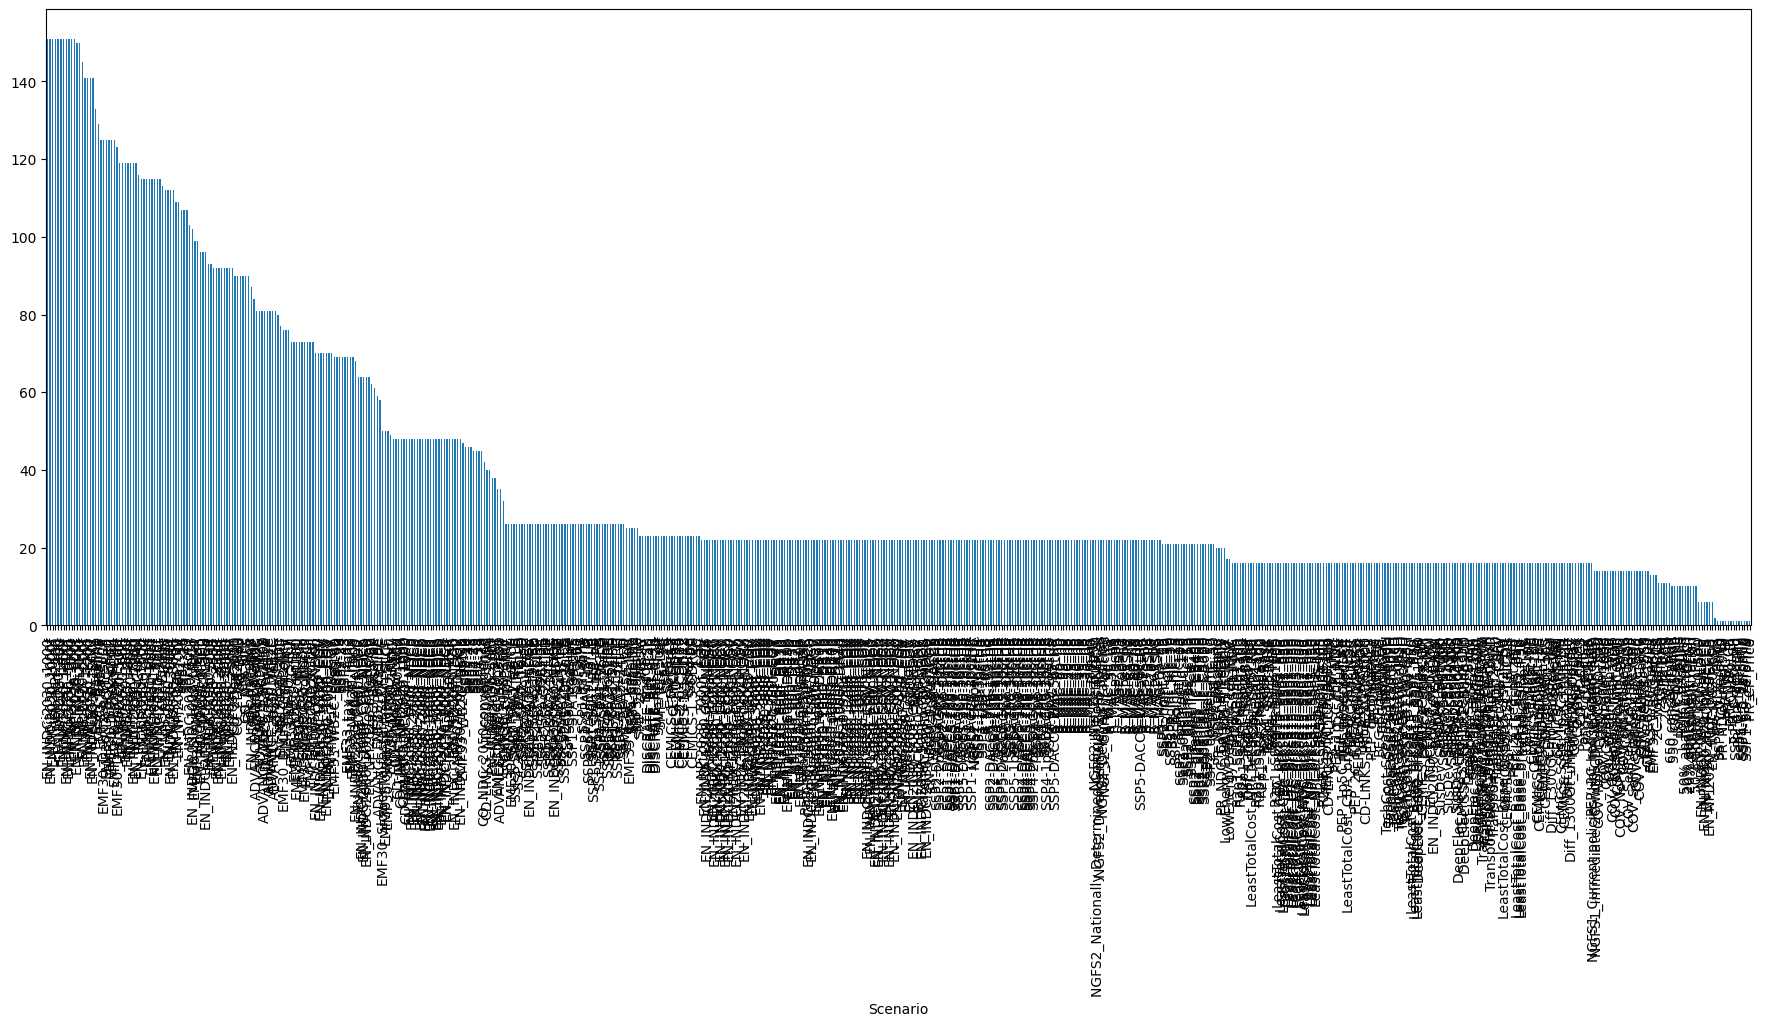

In [7]:
plt.figure(figsize=(22, 8))
df['Scenario'].value_counts().plot(kind= 'bar')

<Axes: ylabel='count'>

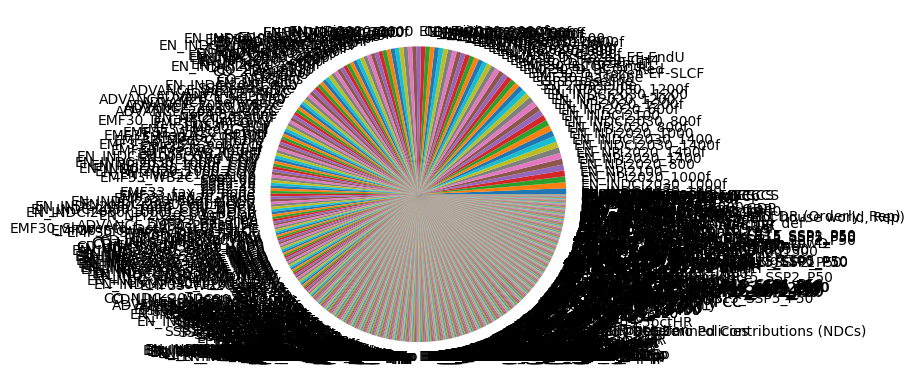

In [8]:
df['Scenario'].value_counts().plot(kind= 'pie')

In [9]:
df['Scenario'].value_counts()

Scenario
EN_INDCi2030_1000     151
EN_INDCi2030_1000f    151
EN_NPi2020_1000f      151
EN_NPi2100            151
EN_NPi2020_800        151
                     ... 
PR_CP_Intensity         1
SSP5-8.5_zeromig        1
SSP4-6.0_zeromig        1
SSP1-1.9_zeromig        1
PR_CP_Price             1
Name: count, Length: 636, dtype: int64

In [10]:
# number of scenarioes in the dataset
len(df['Scenario'].unique().tolist())

636

In [11]:
df['Variable'].value_counts()

Variable
AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes    1290
AR6 climate diagnostics|Harmonized|Emissions|CO2                                    1287
AR6 climate diagnostics|Harmonized|Emissions|N2O                                    1281
AR6 climate diagnostics|Harmonized|Emissions|CH4                                    1272
AR6 climate diagnostics|Harmonized|Emissions|Sulfur                                 1271
AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU                              1260
AR6 climate diagnostics|Harmonized|Emissions|F-Gases                                1094
AR6 climate diagnostics|Harmonized|Emissions|OC                                     1072
AR6 climate diagnostics|Harmonized|Emissions|NOx                                    1072
AR6 climate diagnostics|Harmonized|Emissions|CO                                     1062
AR6 climate diagnostics|Harmonized|Emissions|VOC                                    1052
AR6 climate 

Thus we can understand that not all sceanrioes managed to produce all the emissions variables. for example, HFC32, HFC143a, CF4 and so on are not counted in all scenarioes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23411 entries, 0 to 23410
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23411 non-null  int64  
 1   Model          23411 non-null  object 
 2   Scenario       23411 non-null  object 
 3   Region         23411 non-null  object 
 4   Variable       23411 non-null  object 
 5   Unit           23411 non-null  object 
 6   2019           23411 non-null  float64
 7   2020           23411 non-null  float64
 8   2021           23411 non-null  float64
 9   2022           23411 non-null  float64
 10  2023           23411 non-null  float64
 11  2024           23411 non-null  float64
 12  2025           23411 non-null  float64
 13  2026           23411 non-null  float64
 14  2027           23411 non-null  float64
 15  2028           23411 non-null  float64
 16  2029           23411 non-null  float64
 17  2030           23411 non-null  float64
 18  2031  

In [13]:
df.isnull().sum()

Unnamed: 0          0
Model               0
Scenario            0
Region              0
Variable            0
                 ... 
2098                0
2099                0
2100                0
Category         1708
Category_name    1708
Length: 90, dtype: int64

In [14]:
# coulmn names 
df.columns

Index(['Unnamed: 0', 'Model', 'Scenario', 'Region', 'Variable', 'Unit', '2019',
       '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037',
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055',
       '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064',
       '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073',
       '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091',
       '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100',
       'Category', 'Category_name'],
      dtype='object')

In [15]:
df_clean = df.dropna()

In [16]:
df.shape

(23411, 90)

In [17]:
df_clean.shape

(21703, 90)

In [18]:
# lets check that the emissions category column is full of all categorties (C1 to C8)
df_clean['Category'].unique().tolist()

['C3', 'C5', 'C6', 'C7', 'C4', 'C1', 'C2', 'C8']

### ## check the number of models and scenarioes in the dataset in the clean dataframe 

<Axes: xlabel='Model'>

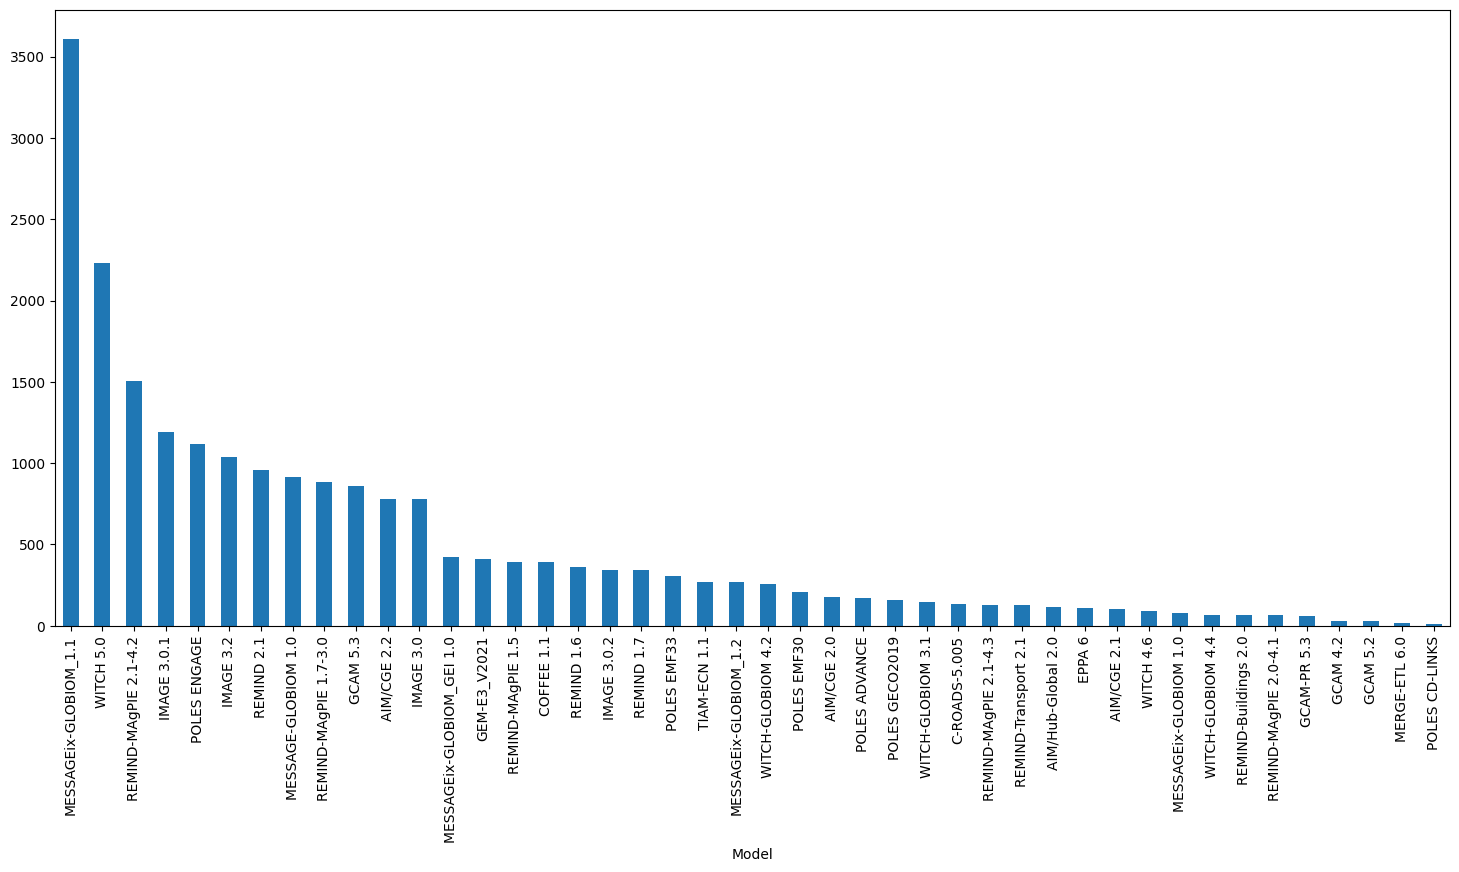

In [19]:
# explore the dataset number of dominat models
plt.figure(figsize=(18, 8))
df_clean['Model'].value_counts().plot(kind= 'bar')



<Axes: xlabel='Scenario'>

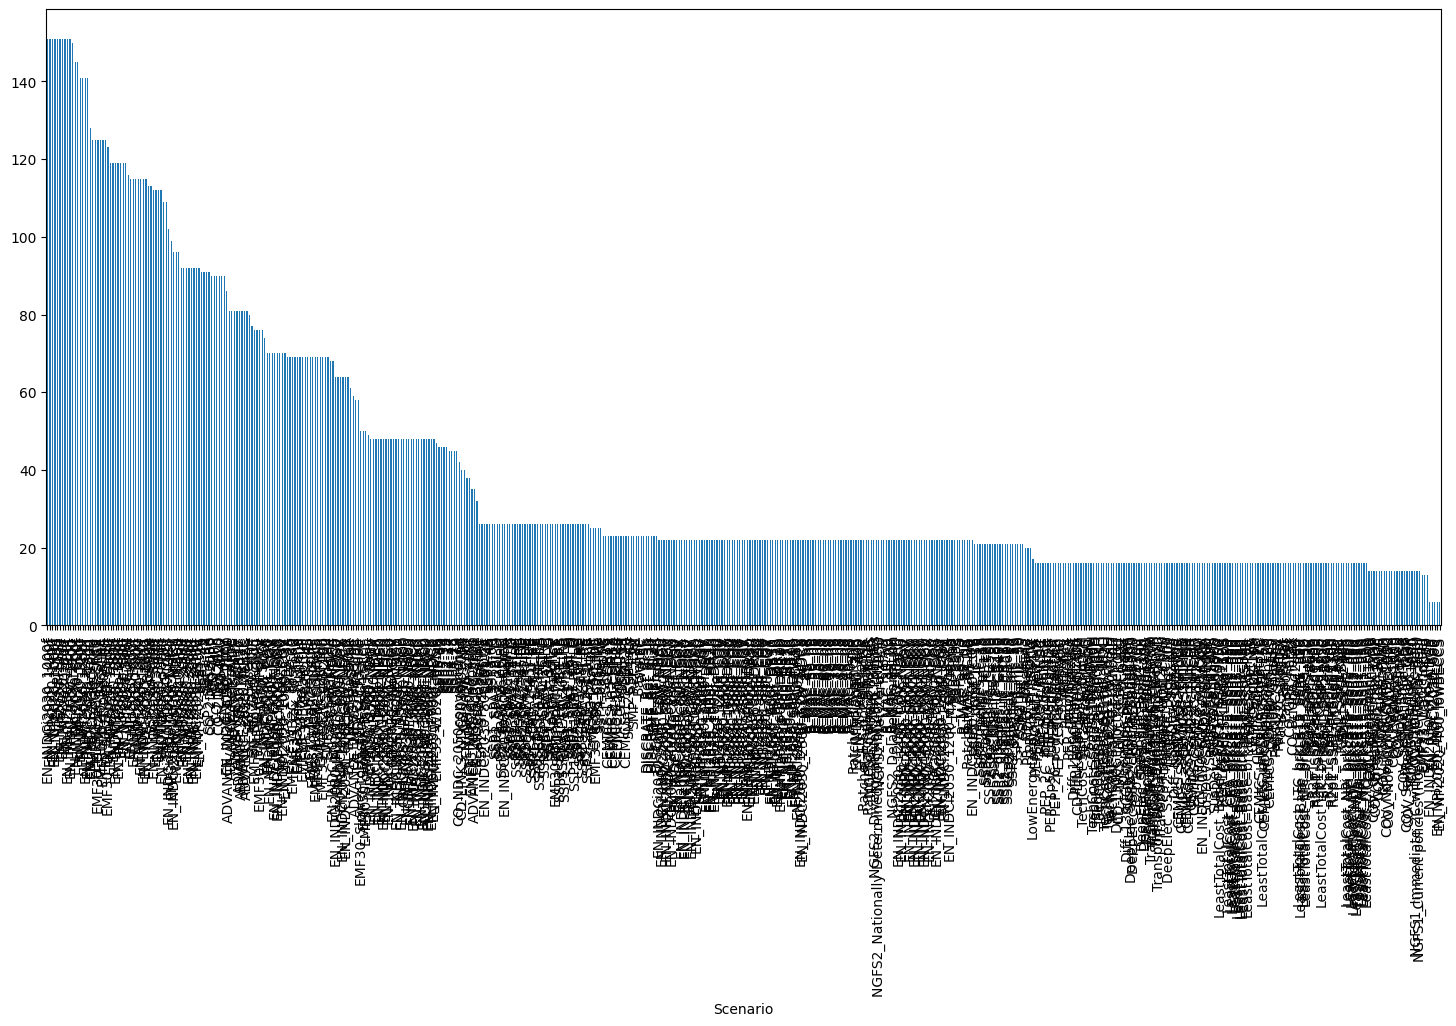

In [20]:
# explore the dataset number of dominat scenarioes
plt.figure(figsize=(18, 8))
df_clean['Scenario'].value_counts().plot(kind= 'bar')

In [21]:
len(df_clean['Scenario'].unique().tolist())

552

Now, we are sure that the emissions category column ['Category'] has the 8 categories. Lets check the distributions of data points in this column. 

<Axes: xlabel='Category'>

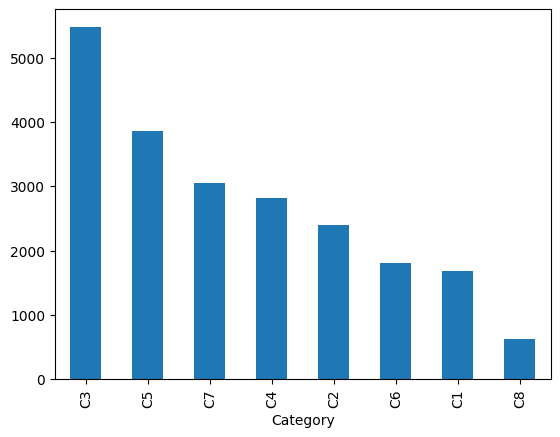

In [22]:
df_clean['Category'].value_counts().plot(kind = 'bar')

C8 is the least represented in the dataset. It can be omitted as it showsn scenarioes of very high emisisons and warming potential. 
Bu we can leave it and try the classification model with it and without it. 

## Re-arranging the dataset

The dataset is presented with time columns. However, we need the features as columns. Features for the classification of the global warming potential of scenarioes include GHG emissions, CO2 emisisons, energy demand (oil, gas, coal, renewables), and carbon removal technology scale. 

The dataset should be restructured to represent these features as column to start feature engineering of the dataset. 

In [23]:
# shorten the dataset into a shorter version with the values of interest
##NOTE: the dataset is on Global basis - the region is always 'World'

df_clean = df_clean[['Model', 'Scenario', 'Variable', 'Unit','2030', '2040', '2050', 'Category']]



In [24]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3


In [25]:
# convert df_clean into long format

df_l = df_clean.melt(id_vars = ['Model', 'Scenario', 'Variable', 'Unit', 'Category'],
                                    value_vars = ['2030', '2040','2050'],
                                    var_name = 'Year',
                                    value_name = 'Variable_Value')

In [26]:
# convert the long formate into a pivot formate with the variables at each year is a column
df_l.head()

,Model,Scenario,Variable,Unit,Category,Year,Variable_Value
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,C3,2030,5.456829
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C3,2030,228.274770
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,C3,2030,683.920550
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2030,29708.564518
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,C3,2030,-743.399175


In [27]:
# now we need to find a way to get the features take into account the year like emisisons 2030, emissions 2040, ....
## this would require 1] selecting he main features, 2] rearranging the dataset with features at time as columns.

df_l.Variable.unique()

array(['AR6 climate diagnostics|Harmonized|Emissions|BC',
       'AR6 climate diagnostics|Harmonized|Emissions|CH4',
       'AR6 climate diagnostics|Harmonized|Emissions|CO',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes',
       'AR6 climate diagnostics|Harmonized|Emissions|F-Gases',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC125',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC134a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC143a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC227ea',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC23',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC32',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC43-10',
       'AR6 climate diagnostics|Harmonized|Emissions|N2O',
       'AR6 climate di

In [28]:
# choose CH4 and CO2 in the features dataset
df_f = df_l[df_l['Variable'].isin(['AR6 climate diagnostics|Harmonized|Emissions|CH4','AR6 climate diagnostics|Harmonized|Emissions|CO2'])]

In [29]:
df_f

,Model,Scenario,Variable,Unit,Category,Year,Variable_Value
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C3,2030,228.274770
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2030,29708.564518
23,AIM/CGE 2.0,SSP1-34,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C5,2030,290.698352
25,AIM/CGE 2.0,SSP1-34,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C5,2030,35304.481960
45,AIM/CGE 2.0,SSP1-45,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C6,2030,379.047509
...,...,...,...,...,...,...,...
65087,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2050,18776.198777
65094,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C1,2050,125.048375
65095,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C1,2050,2298.337803
65102,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C7,2050,471.009648


In [30]:
df_f['Variable'].replace({"AR6 climate diagnostics|Harmonized|Emissions|CH4":'CH4-Mt/yr', "AR6 climate diagnostics|Harmonized|Emissions|CO2": 'CO2-Mt/yr'}, inplace=True)


/var/folders/r_/vh0ml1497c72wtrptfjdybf40000gn/T/ipykernel_613/837906129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_f['Variable'].replace({"AR6 climate diagnostics|Harmonized|Emissions|CH4":'CH4-Mt/yr', "AR6 climate diagnostics|Harmonized|Emissions|CO2": 'CO2-Mt/yr'}, inplace=True)
/var/folders/r_/vh0ml1497c72wtrptfjdybf40000gn/T/ipykernel_613/837906129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

Consider CO2 and CH4 are the main predictors of emissions to classify scenarioes 

In [31]:
## make the data as columns, 2030, 2040, 2050
df2030 = df_f[df_f['Year']=='2030'].replace({'CH4-Mt/yr':'CH4-2030-Mt/yr', 'CO2-Mt/yr':'CO2-2030Mt/yr'})
df2030 = df2030[['Model','Scenario','Variable','Variable_Value','Category']]
df2030.head()

,Model,Scenario,Variable,Variable_Value,Category
1,AIM/CGE 2.0,SSP1-26,CH4-2030-Mt/yr,228.274770,C3
3,AIM/CGE 2.0,SSP1-26,CO2-2030Mt/yr,29708.564518,C3
23,AIM/CGE 2.0,SSP1-34,CH4-2030-Mt/yr,290.698352,C5
25,AIM/CGE 2.0,SSP1-34,CO2-2030Mt/yr,35304.481960,C5
45,AIM/CGE 2.0,SSP1-45,CH4-2030-Mt/yr,379.047509,C6


In [32]:
## repeat to 2040 and 2050
df2040 = df_f[df_f['Year']=='2040'].replace({'CH4-Mt/yr':'CH4-2040-Mt/yr', 'CO2-Mt/yr':'CO2-2040Mt/yr'})
df2040 = df2040[['Model','Scenario','Variable','Variable_Value','Category']]

df2050 = df_f[df_f['Year']=='2050'].replace({'CH4-Mt/yr':'CH4-2050-Mt/yr', 'CO2-Mt/yr':'CO2-2050Mt/yr'})
df2050 = df2050[['Model','Scenario','Variable','Variable_Value','Category']]

In [33]:
df2050.head()

,Model,Scenario,Variable,Variable_Value,Category
43407,AIM/CGE 2.0,SSP1-26,CH4-2050-Mt/yr,151.312704,C3
43409,AIM/CGE 2.0,SSP1-26,CO2-2050Mt/yr,12965.258478,C3
43429,AIM/CGE 2.0,SSP1-34,CH4-2050-Mt/yr,200.397111,C5
43431,AIM/CGE 2.0,SSP1-34,CO2-2050Mt/yr,26061.047409,C5
43451,AIM/CGE 2.0,SSP1-45,CH4-2050-Mt/yr,388.505211,C6


In [34]:
## merge datasets 

dfx = pd.concat([df2030,df2040, df2050], axis=0)


In [35]:
df_final = pd.pivot_table(dfx, values='Variable_Value', index=['Model', 'Scenario', 'Category'],
                    columns=['Variable'], aggfunc=np.sum)
df_final.head()

/var/folders/r_/vh0ml1497c72wtrptfjdybf40000gn/T/ipykernel_613/2740205698.py:1: FutureWarning: The provided callable <function sum at 0x104c01940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_final = pd.pivot_table(dfx, values='Variable_Value', index=['Model', 'Scenario', 'Category'],


Variable                            CH4-2030-Mt/yr  CH4-2040-Mt/yr  \
Model       Scenario      Category                                   
AIM/CGE 2.0 SSP1-26       C3            228.274770      172.269750   
            SSP1-34       C5            290.698352      240.085590   
            SSP1-45       C6            379.047509      448.796851   
            SSP1-Baseline C7            442.730060      471.711604   
            SSP4-26       C3            229.929154      186.151407   

Variable                            CH4-2050-Mt/yr  CO2-2030Mt/yr  \
Model       Scenario      Category                                  
AIM/CGE 2.0 SSP1-26       C3            151.312704   29708.564518   
            SSP1-34       C5            200.397111   35304.481960   
            SSP1-45       C6            388.505211   39655.954971   
            SSP1-Baseline C7            490.708618   42098.155593   
            SSP4-26       C3            173.673817   32846.727488   

Variable                            CO2-2040Mt/yr  CO2-2050Mt/yr  
Model       Scenario      Category                                
AIM/CGE 2.0 SSP1-26       C3         18913.013818   12965.258478  
            SSP1-34       C5         31112.520790   26061.047409  
            SSP1-45       C6         38482.362210   34811.197324  
            SSP1-Baseline C7         42176.638483   40023.059672  
            SSP4-26       C3         20297.394702   13189.644577

In [36]:
df_final.columns = df_final.columns.map(''.join)
df_final.reset_index(inplace = True)


In [37]:
df_final.head()

Variable,Model,Scenario,Category,CH4-2030-Mt/yr,CH4-2040-Mt/yr,CH4-2050-Mt/yr,CO2-2030Mt/yr,CO2-2040Mt/yr,CO2-2050Mt/yr
0,AIM/CGE 2.0,SSP1-26,C3,228.274770,172.269750,151.312704,29708.564518,18913.013818,12965.258478
1,AIM/CGE 2.0,SSP1-34,C5,290.698352,240.085590,200.397111,35304.481960,31112.520790,26061.047409
2,AIM/CGE 2.0,SSP1-45,C6,379.047509,448.796851,388.505211,39655.954971,38482.362210,34811.197324
3,AIM/CGE 2.0,SSP1-Baseline,C7,442.730060,471.711604,490.708618,42098.155593,42176.638483,40023.059672
4,AIM/CGE 2.0,SSP4-26,C3,229.929154,186.151407,173.673817,32846.727488,20297.394702,13189.644577


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Model           1182 non-null   object 
 1   Scenario        1182 non-null   object 
 2   Category        1182 non-null   object 
 3   CH4-2030-Mt/yr  1182 non-null   float64
 4   CH4-2040-Mt/yr  1182 non-null   float64
 5   CH4-2050-Mt/yr  1182 non-null   float64
 6   CO2-2030Mt/yr   1182 non-null   float64
 7   CO2-2040Mt/yr   1182 non-null   float64
 8   CO2-2050Mt/yr   1182 non-null   float64
dtypes: float64(6), object(3)
memory usage: 83.2+ KB


In [39]:
df_final.columns

Index(['Model', 'Scenario', 'Category', 'CH4-2030-Mt/yr', 'CH4-2040-Mt/yr',
       'CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr'],
      dtype='object', name='Variable')

Finally the dataset is in a clean and clear format with the features as columns

## Visualization and exploration 

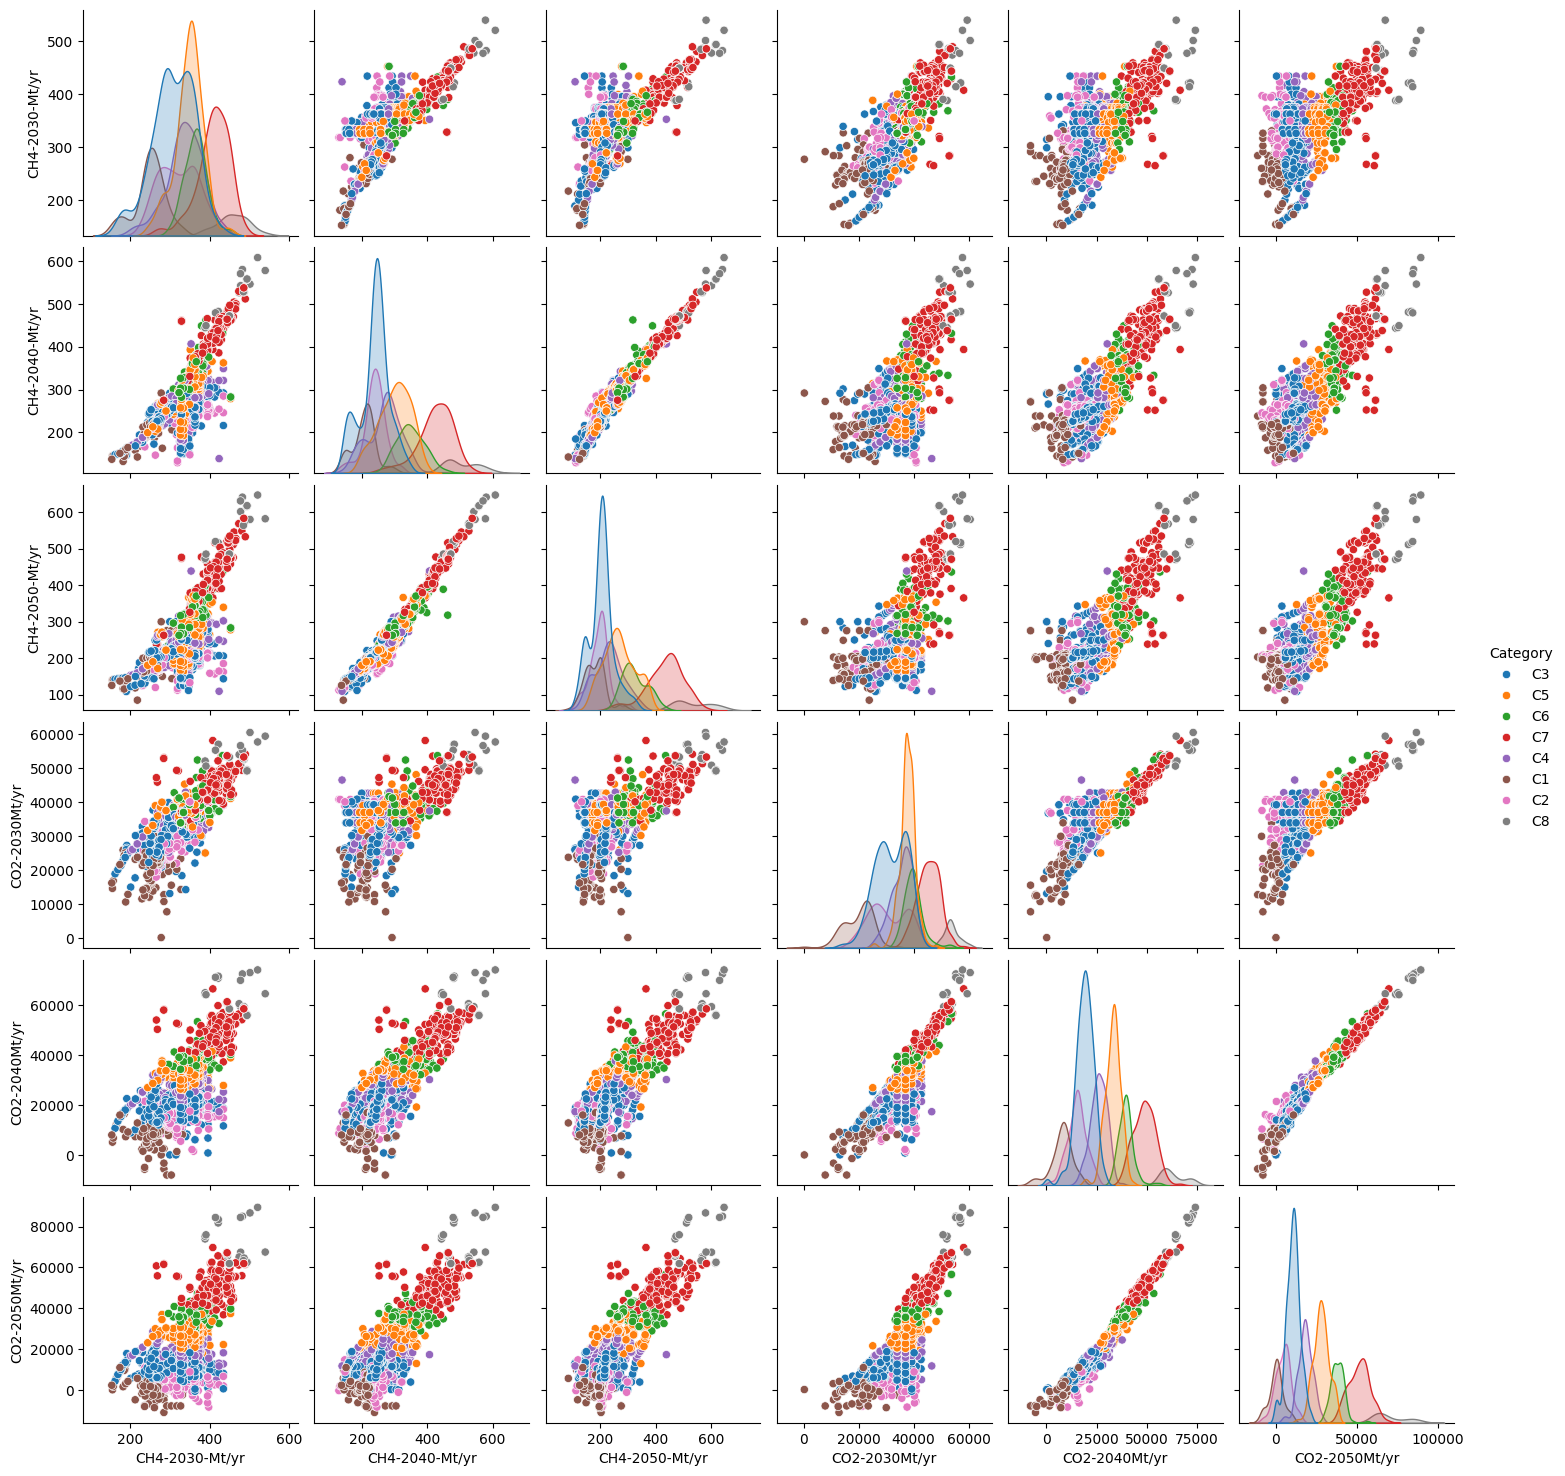

In [40]:

sns.pairplot(df_final, hue='Category');

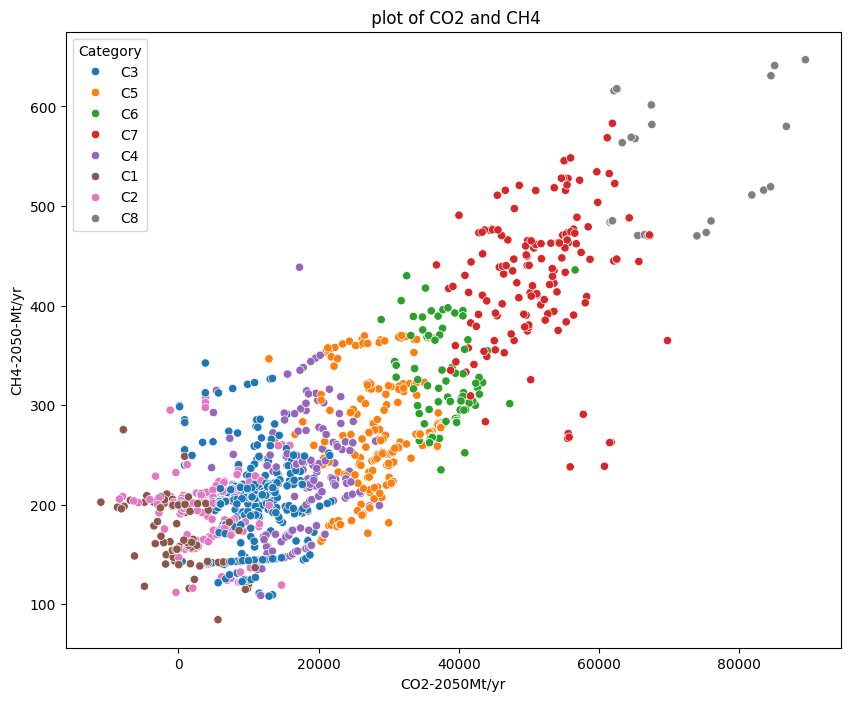

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_final, x="CO2-2050Mt/yr", y="CH4-2050-Mt/yr", hue="Category")
plt.title(' plot of CO2 and CH4')
plt.show()

The data is widely variable and seperable

### KNN classifier 

In [42]:
# Import necessary libraries for classification 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix


In [43]:
X = df_final[['CH4-2030-Mt/yr', 'CH4-2040-Mt/yr','CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr']]
y = df_final.Category

# Convert string target variable to integers
le = LabelEncoder()
y = le.fit_transform(y)



In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n\n\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25  1  2  0  0  0  0  0]
 [ 3 23 11  0  0  0  0  0]
 [ 3  7 74  6  0  0  0  0]
 [ 0  1 12 31  4  0  0  0]
 [ 0  0  1  4 47  7  0  0]
 [ 0  0  0  0  8 21  4  0]
 [ 0  0  0  0  0  4 43  1]
 [ 0  0  0  0  0  0  3  9]]



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.72      0.62      0.67        37
           2       0.74      0.82      0.78        90
           3       0.76      0.65      0.70        48
           4       0.80      0.80      0.80        59
           5       0.66      0.64      0.65        33
           6       0.86      0.90      0.88        48
           7       0.90      0.75      0.82        12

    accuracy                           0.77       355
   macro avg       0.78      0.76      0.77       355
weighted avg       0.77      0.77      0.77       355



In [45]:
# print the mapping of the encoder 
# Print the mapping
for class_index, class_name in enumerate(le.classes_):
    print(f'The string value "{class_name}" was encoded to integer value "{class_index}"')


The string value "C1" was encoded to integer value "0"
The string value "C2" was encoded to integer value "1"
The string value "C3" was encoded to integer value "2"
The string value "C4" was encoded to integer value "3"
The string value "C5" was encoded to integer value "4"
The string value "C6" was encoded to integer value "5"
The string value "C7" was encoded to integer value "6"
The string value "C8" was encoded to integer value "7"


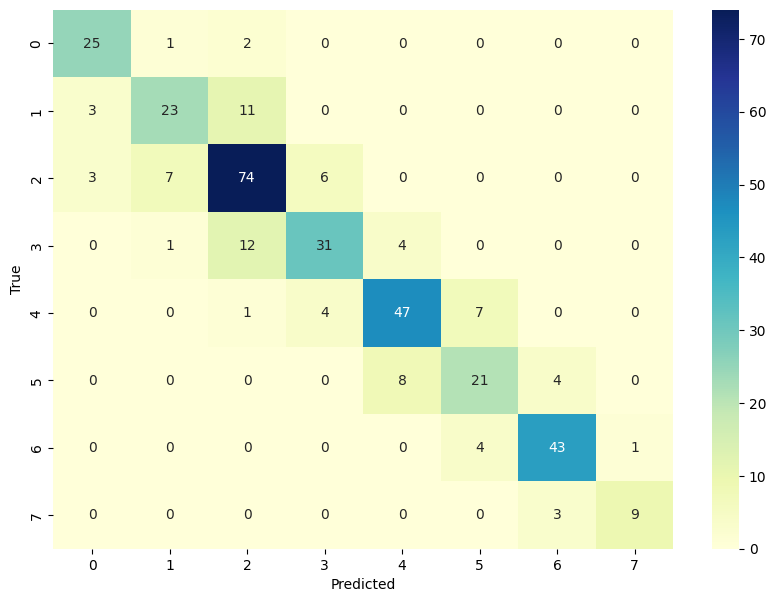

In [46]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Try CART Model 



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.71      0.73      0.72        37
           2       0.80      0.80      0.80        90
           3       0.73      0.56      0.64        48
           4       0.82      0.90      0.85        59
           5       0.76      0.79      0.78        33
           6       0.94      0.92      0.93        48
           7       1.00      1.00      1.00        12

    accuracy                           0.81       355
   macro avg       0.82      0.82      0.82       355
weighted avg       0.80      0.81      0.80       355



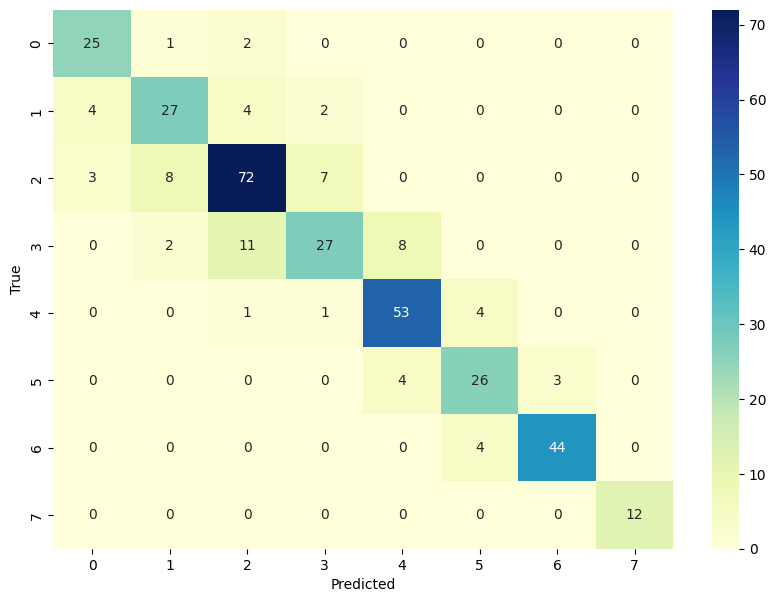

In [47]:

# Create CART Classifier
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

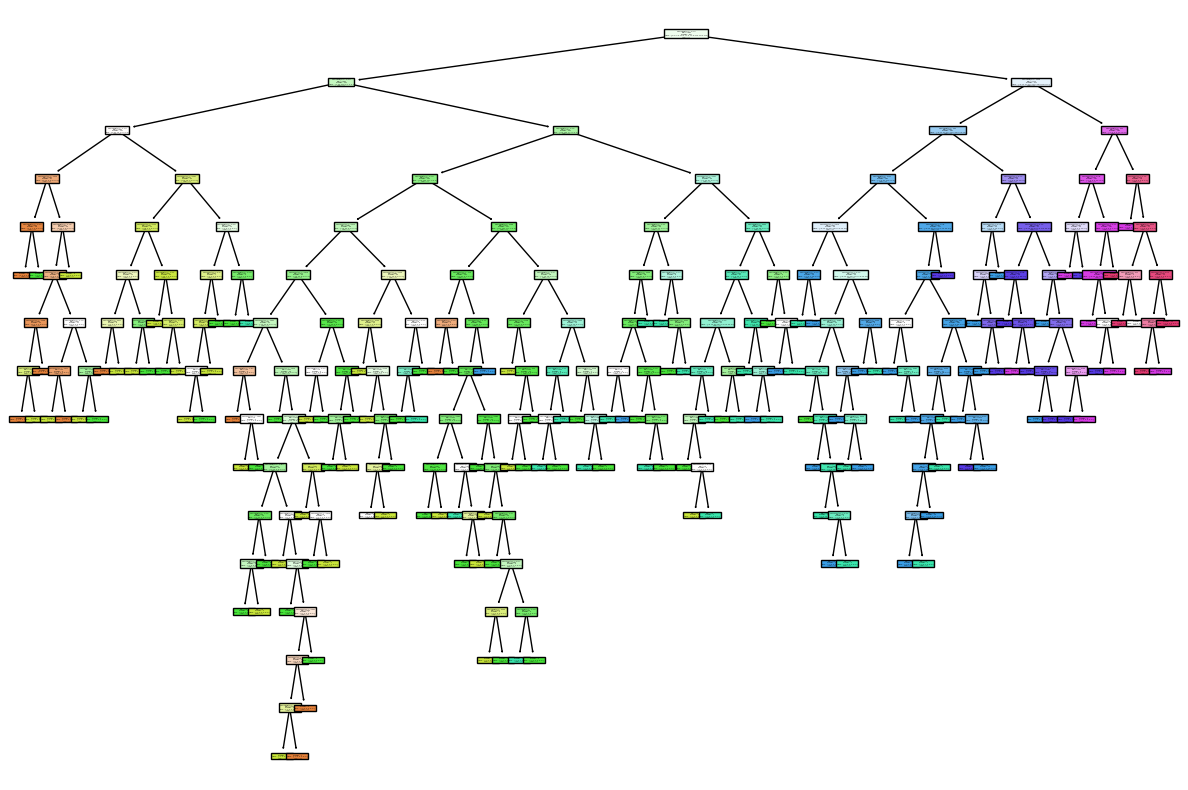

In [48]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, 
               feature_names=('CH4-2030-Mt/yr', 'CH4-2040-Mt/yr','CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr'),  
               class_names=df_final.Category,
               filled=True)
plt.show()

### Apply real prediction 

In [49]:
sample = [121.5083759,102.6860145,88.68055016,35268.12039,31672.54836,28827.7679]  # replace this with your actual sample

# Scikit-learn expects a 2D array-like for the samples, so we wrap `sample` in another list
sample = [sample]

predicted_class = clf.predict(sample)

print(f'The predicted class is: {predicted_class}')

The predicted class is: [7]


In [50]:
sample = [114.9667036,	93.22723399,72.83236786,	31172.65633,	23295.05818,	14730.07949]  # replace this with your actual sample

# Scikit-learn expects a 2D array-like for the samples, so we wrap `sample` in another list
sample = [sample]

predicted_class = clf.predict(sample)

print(f'The predicted class is: {predicted_class}')

The predicted class is: [7]


## SVM

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [52]:
svc = SVC(C=1000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8253521126760563


array([[24,  1,  3,  0,  0,  0,  0,  0],
       [ 2, 26,  9,  0,  0,  0,  0,  0],
       [ 4,  3, 78,  5,  0,  0,  0,  0],
       [ 0,  1,  6, 35,  6,  0,  0,  0],
       [ 0,  1,  1,  3, 50,  4,  0,  0],
       [ 0,  0,  0,  0,  3, 27,  3,  0],
       [ 0,  0,  0,  0,  0,  7, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 12]])

#### Something is wrong with the code. I need to recreate the model with CO2 emisisons only and check the perfromance. In addition, perform feature engineering to select other prarameters. 

# Another method Feb 2024
No selection of features and features will be seclected after selction process 

In [53]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3


In [54]:
df_clean['Variable'][1]

'AR6 climate diagnostics|Harmonized|Emissions|CH4'

In [65]:
## reduce the length of the variables in the Variable column

## use replace method on teh column, much easier than using the lambda function and rstrip or lstrip methods

df_clean['variables_short'] = df_clean['Variable'].str.replace('AR6 climate diagnostics|Harmonized|Emissions|', '')

In [66]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category,variables_short
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3,BC
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3,CH4
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3,CO
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3,CO2
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3,CO2|AFOLU


In [57]:
df_clean.columns

Index(['Model', 'Scenario', 'Variable', 'Unit', '2030', '2040', '2050',
       'Category', 'average2030_2040_2050'],
      dtype='object')

In [58]:
## shorten the dataframe to inclode only the features related to the models, sceanarieos, climate temperatue category and the years 2030, 2040, 2050
#df_c = df_clean[['Model', 'Scenario', 'Region', 'Variable', 'Unit','2030', '2040', '2050','Category']]

In [59]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category,average2030_2040_2050
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3,13.031585
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3,551.857223
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3,1768.936818
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3,61586.836814
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3,-5906.875183


## The problem is a classification problem. 
### The model target (label) is to classify the emissions 'category' of each energy scenario.
### The variables are the emissions varibales at the years 2030, 2040, 2050. 

### Moving forard, we need to explore 'df_c' and identify which variables to focus on to determine the target climate emissions.


In [60]:
## create an average number to represent the values of the three columns 2030, 2040 and 2050
df_c = df_clean

### the purpose of creating the average number is to replace the three columns with values by one. The problem is that now the model does not take into account the increasing or decreasing trend. However, as long as all climate and eneregy projections start fromt he same value and base year. The average will present the trend. 


In [62]:
df_c['average2030_2040_2050'] = (df_c['2030']+ df_c['2040']+ df_c['2050'])/3

In [63]:
df_c.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category,average2030_2040_2050
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3,4.343862
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3,183.952408
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3,589.645606
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3,20528.945605
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3,-1968.958394


In [64]:
df_c = df_c.drop(columns=['2030', '2040', '2050'])

In [65]:
df_c= df_c.drop(columns=['Unit'])

In [66]:
df_processing = pd.pivot_table(df_c, values='average2030_2040_2050', index=['Model', 'Scenario', 'Category'],
                    columns=['Variable'], aggfunc=np.sum)

/var/folders/r_/vh0ml1497c72wtrptfjdybf40000gn/T/ipykernel_7470/1532010852.py:1: FutureWarning: The provided callable <function sum at 0x1160af380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_processing = pd.pivot_table(df_c, values='average2030_2040_2050', index=['Model', 'Scenario', 'Category'],


In [67]:
df_processing.reset_index(inplace = True)

In [68]:
df_processing.head()

Variable,Model,Scenario,Category,AR6 climate diagnostics|Harmonized|Emissions|BC,AR6 climate diagnostics|Harmonized|Emissions|CH4,AR6 climate diagnostics|Harmonized|Emissions|CO,AR6 climate diagnostics|Harmonized|Emissions|CO2,AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU,AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes,AR6 climate diagnostics|Harmonized|Emissions|F-Gases,...,AR6 climate diagnostics|Harmonized|Emissions|NH3,AR6 climate diagnostics|Harmonized|Emissions|NOx,AR6 climate diagnostics|Harmonized|Emissions|OC,AR6 climate diagnostics|Harmonized|Emissions|PFC,AR6 climate diagnostics|Harmonized|Emissions|PFC|C2F6,AR6 climate diagnostics|Harmonized|Emissions|PFC|C6F14,AR6 climate diagnostics|Harmonized|Emissions|PFC|CF4,AR6 climate diagnostics|Harmonized|Emissions|SF6,AR6 climate diagnostics|Harmonized|Emissions|Sulfur,AR6 climate diagnostics|Harmonized|Emissions|VOC
0,AIM/CGE 2.0,SSP1-26,C3,4.343862,183.952408,589.645606,20528.945605,-1968.958394,22497.903999,347.367069,...,63.171176,56.447538,21.310673,1.973994,NaN,NaN,NaN,0.669217,29.736900,152.142707
1,AIM/CGE 2.0,SSP1-34,C5,4.469045,243.727017,594.297599,30826.016720,-731.529894,31557.546614,1277.855987,...,65.137457,65.207704,21.234653,6.281205,NaN,NaN,NaN,2.118415,36.352993,154.913790
2,AIM/CGE 2.0,SSP1-45,C6,4.626014,405.449857,612.303502,37649.838168,734.654206,36915.183962,2198.377528,...,66.549781,72.206587,21.936833,9.710539,NaN,NaN,NaN,3.224334,40.618579,159.205825
3,AIM/CGE 2.0,SSP1-Baseline,C7,4.680637,468.383427,620.615962,41432.617916,731.204939,40701.412977,2198.681853,...,66.957534,76.121296,22.277710,9.711949,NaN,NaN,NaN,3.224800,43.314055,161.462530
4,AIM/CGE 2.0,SSP4-26,C3,6.472046,196.584793,806.238835,22111.255589,-690.507098,22801.762687,179.742140,...,63.336546,84.911222,28.763088,0.913747,NaN,NaN,NaN,0.308501,51.201383,198.037166


In [69]:
df_processing.shape

(1182, 29)

In [70]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 29 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Model                                                                             1182 non-null   object 
 1   Scenario                                                                          1182 non-null   object 
 2   Category                                                                          1182 non-null   object 
 3   AR6 climate diagnostics|Harmonized|Emissions|BC                                   971 non-null    float64
 4   AR6 climate diagnostics|Harmonized|Emissions|CH4                                  1182 non-null   float64
 5   AR6 climate diagnostics|Harmonized|Emissions|CO                                   978 non-null    float64
 6   

In [71]:
df_processing.isna().sum()

Variable
Model                                                                                 0
Scenario                                                                              0
Category                                                                              0
AR6 climate diagnostics|Harmonized|Emissions|BC                                     211
AR6 climate diagnostics|Harmonized|Emissions|CH4                                      0
AR6 climate diagnostics|Harmonized|Emissions|CO                                     204
AR6 climate diagnostics|Harmonized|Emissions|CO2                                      0
AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU                               16
AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes      0
AR6 climate diagnostics|Harmonized|Emissions|F-Gases                                157
AR6 climate diagnostics|Harmonized|Emissions|HFC                                    244
AR6 climate diagnostics

In [45]:
df_processing.columns

Index(['Model', 'Scenario', 'Category',
       'AR6 climate diagnostics|Harmonized|Emissions|BC',
       'AR6 climate diagnostics|Harmonized|Emissions|CH4',
       'AR6 climate diagnostics|Harmonized|Emissions|CO',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes',
       'AR6 climate diagnostics|Harmonized|Emissions|F-Gases',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC125',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC134a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC143a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC227ea',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC23',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC32',
       'AR6 climate diagnostics|Harmonized|Emissio

In [46]:
df_post_pr = df_processing[['Model', 'Scenario', 'Category', 'AR6 climate diagnostics|Harmonized|Emissions|CH4',
                            'AR6 climate diagnostics|Harmonized|Emissions|CO2',
                            'AR6 climate diagnostics|Harmonized|Emissions|N2O', 'AR6 climate diagnostics|Harmonized|Emissions|Sulfur']]

In [47]:
df_post_pr.head()

Variable,Model,Scenario,Category,AR6 climate diagnostics|Harmonized|Emissions|CH4,AR6 climate diagnostics|Harmonized|Emissions|CO2,AR6 climate diagnostics|Harmonized|Emissions|N2O,AR6 climate diagnostics|Harmonized|Emissions|Sulfur
0,AIM/CGE 2.0,SSP1-26,C3,551.857223,61586.83682,20533.337347,89.210700
1,AIM/CGE 2.0,SSP1-34,C5,731.181052,92478.05016,25636.884655,109.058978
2,AIM/CGE 2.0,SSP1-45,C6,1216.349571,112949.51450,36669.319390,121.855738
3,AIM/CGE 2.0,SSP1-Baseline,C7,1405.150282,124297.85374,40510.200000,129.942165
4,AIM/CGE 2.0,SSP4-26,C3,589.754378,66333.76677,21635.549226,153.604148


array([[<AxesSubplot:title={'center':'AR6 climate diagnostics|Harmonized|Emissions|CH4'}>,
        <AxesSubplot:title={'center':'AR6 climate diagnostics|Harmonized|Emissions|CO2'}>],
       [<AxesSubplot:title={'center':'AR6 climate diagnostics|Harmonized|Emissions|N2O'}>,
        <AxesSubplot:title={'center':'AR6 climate diagnostics|Harmonized|Emissions|Sulfur'}>]],
      dtype=object)

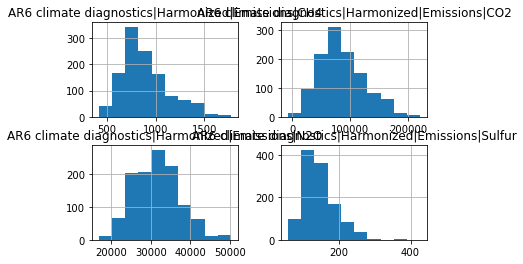

In [48]:
df_post_pr.hist()

We will make a histogram for each element in the dateframe to check which ones can be good for seperating the target category of emissions

No handles with labels found to put in legend.


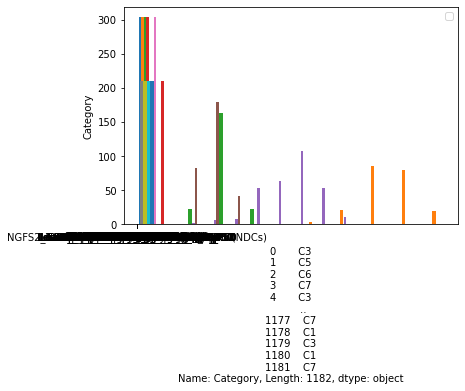

In [71]:
## feature distribution based on the category of emissions

feature_idx = 10; bins = np.linspace(7, 15, 12)

C3 = df_post_pr[df_post_pr['Category'] == 'C3'] # low quality wines
C5 = df_post_pr[df_post_pr['Category'] == 'C5'] # high quality wines

plt.hist(C3)
plt.hist(C5)

plt.xlabel('{}'.format(df_post_pr['Category']))
plt.ylabel('Category')

plt.legend(loc='upper right')
plt.show()


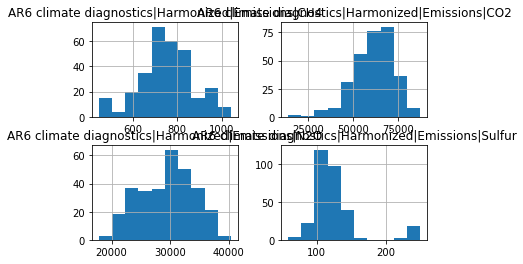

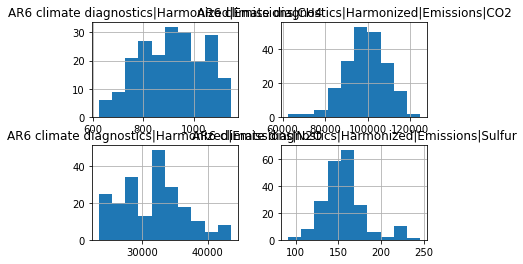

In [70]:
C3 = df_post_pr[df_post_pr['Category'] == 'C3'].hist()
C5 = df_post_pr[df_post_pr['Category'] == 'C5'].hist()